# Visualization of Phase-Picks at NCI on ISC Events 


##  Fei Zhang
### October 2018

View seismic events, stations, and rays



In [1]:
import sys
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

In [2]:
# get the pst packages into PYTHONPATH 
# sys.path.append("/Softlab/Githubz/passive-seismic")  

#from seismic.cluster.cluster import Grid2 
#from seismic.traveltime.sort_rays import sort,sort2

In [3]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
   
   
    
    # read infile, tweek below
    in_pdf =  pd.read_csv(csvfile, header='infer')   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    #in_pdf =  pd.read_csv(csvfile,  sep='\s+', header='infer') # white space
  
    # columns you are interested?
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]  # take a subset of columns
    
    return in_pdf  #pandas_data_frame

In [4]:
# OR read in from already sorted (zoned) csv file
#inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_S.csv'
#inputcsv ='/Softlab/travel_time_tomography/CSV_Data/engdahl/outfile_S.csv'

#inputcsv='/g/data/ha3/rakib/seismic/pst/tests/results/s_arrivals_mag_4_and_above.txt'
#inputcsv='/g/data/ha3/rakib/seismic/pst/tests/results/p_arrivals_mag_4_and_above.txt'
inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/create_input_csv/s_arrivals_mag_4_and_above_sorted1x1.csv'
#inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/create_input_csv/s_gridded_outfile.csv3_mid.CSV'

inputpdf = csv2pdf(inputcsv)

In [5]:
inputpdf.shape

(114935, 20)

In [6]:
inputpdf.head()

,#eventID,originTimestamp,mag,originLon,originLat,originDepthKm,net,sta,cha,pickTimestamp,stationLon,stationLat,baz,distance,ttResidual,snr,bandIndex,source_block,station_block,observed_tt
0,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,PLCA,00T,1.250783e+09,-70.55083,-40.73277,156.900251,82.332581,-9.258177,83.7,1,13421,7798438,1366.905
1,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,LBTB,00T,1.250783e+09,25.59665,-25.01510,236.102959,83.528121,0.007735,123.7,0,13421,7799196,1371.080
2,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GE,GSI,BHZ,1.250783e+09,97.57550,1.30390,311.734998,65.183917,5.325953,21.9,0,13421,7800809,1164.200
3,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,AU,GHSS,SHZ,1.378795e+09,138.60170,-34.91940,357.224945,17.250461,7.771818,9.8,0,13960,20078,428.300
4,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,IU,QSPA,00T,1.378795e+09,144.43820,-89.92890,179.990190,37.954174,-2.049780,20.0,0,13960,7795500,792.225


In [7]:
inputpdf.columns


Index(['#eventID', 'originTimestamp', 'mag', 'originLon', 'originLat',
       'originDepthKm', 'net', 'sta', 'cha', 'pickTimestamp', 'stationLon',
       'stationLat', 'baz', 'distance', 'ttResidual', 'snr', 'bandIndex',
       'source_block', 'station_block', 'observed_tt'],
      dtype='object')

In [8]:
# write out ?
# finalpdf.to_csv('/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv', header=True, index=False, sep=',')

# Begin to Visualize the data

In [9]:
#  which dataframe to view in the following??
pdf2= inputpdf  #sorted_pdf

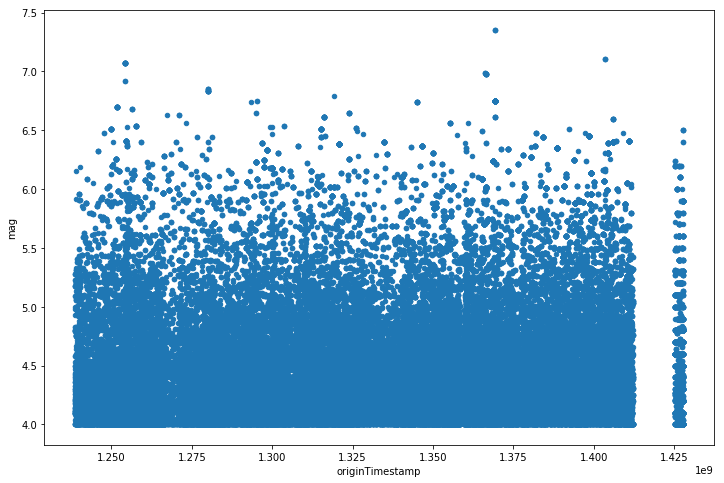

In [10]:


pdf2.plot.scatter(x='originTimestamp', y='mag',figsize=(12,8))

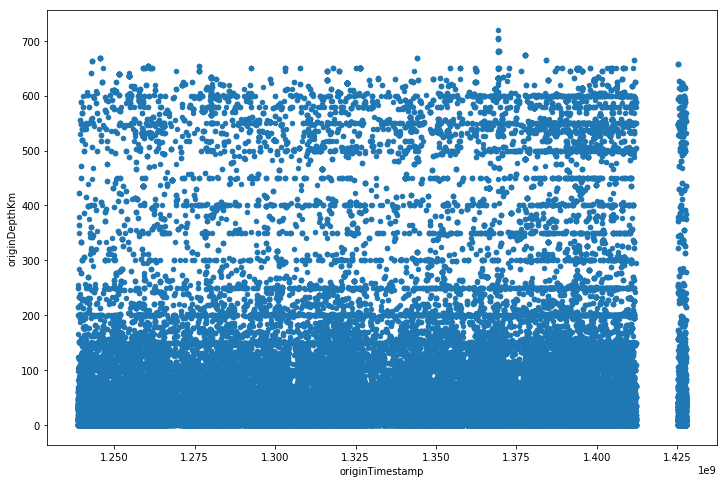

In [11]:
pdf2.plot.scatter(x='originTimestamp', y='originDepthKm',figsize=(12,8))


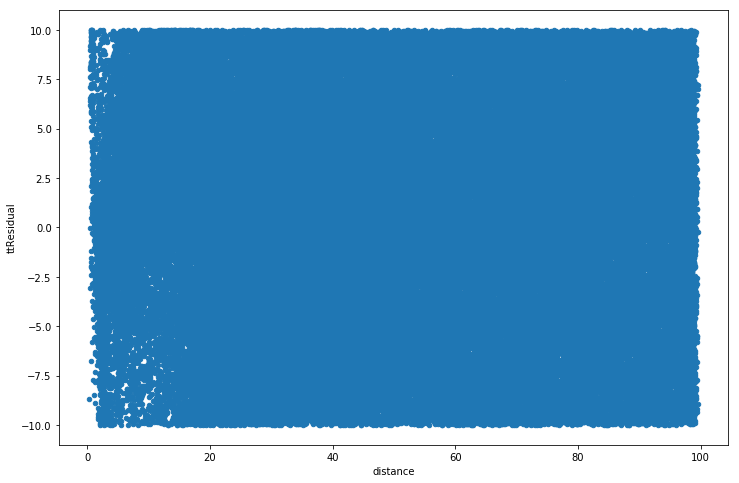

In [12]:
#plt.figure(); 
#pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))

#pdf2.plot.scatter(x='dist', y='ttResidual',figsize=(12,8))
pdf2.plot.scatter(x='distance', y='ttResidual',figsize=(12,8))

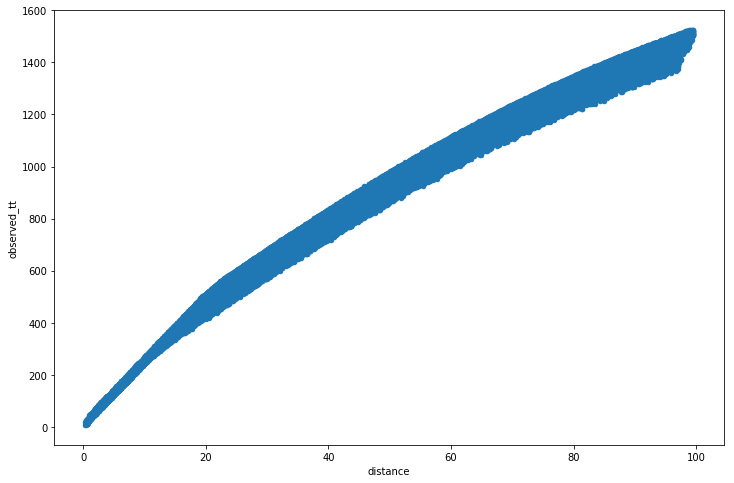

In [13]:
# pdf2['observed_tt'] = pdf2.pickTimestamp - pdf2.originTimestamp

pdf2.plot.scatter(x='distance', y='observed_tt',figsize=(12,8))

In [14]:
# How many events with very shallow depth(KM)?
pdf2[pdf2.originDepthKm<0.1].shape


(9606, 20)

In [15]:

pdf2['originDepthKm'].max()

720.2

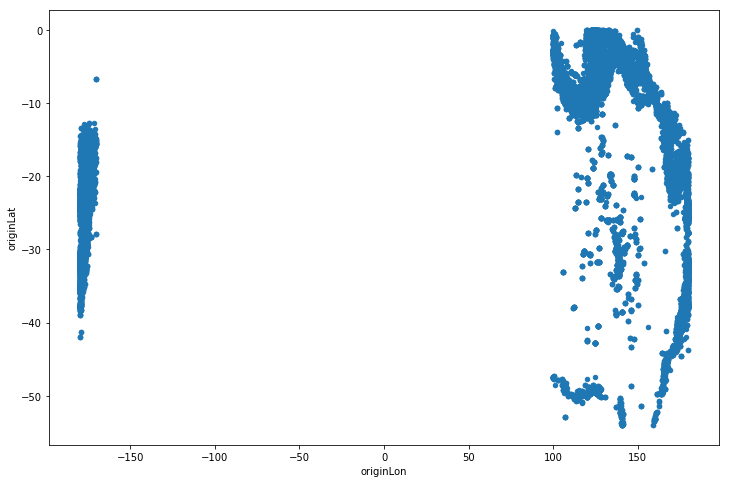

In [16]:
max_blockn = 1948861   #param2x2
#max_blockn = 7795441  # param1x1
pdf2region = pdf2[pdf2.source_block <= max_blockn]
pdf2region.plot.scatter(x='originLon', y='originLat',figsize=(12,8))

In [17]:
print(pdf2region['originLon'].min(),pdf2region['originLon'].max())
print(pdf2region['originLat'].min(),pdf2region['originLat'].max())

-179.9995 179.9989
-53.9737 0.0


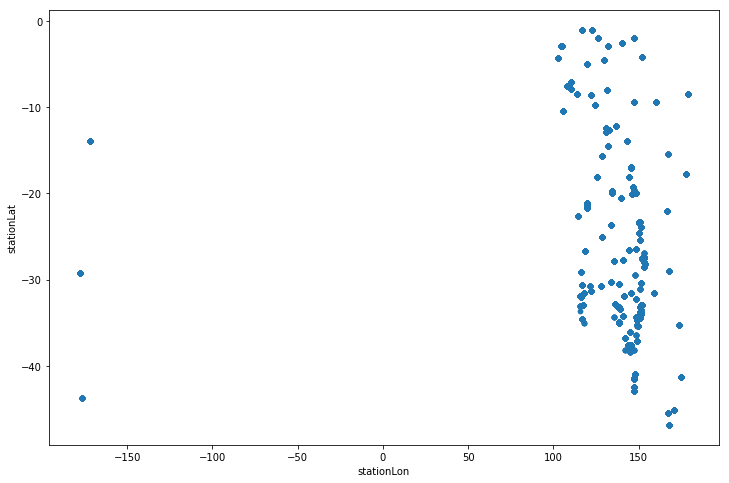

In [18]:
pdf2region = pdf2[pdf2.station_block <= max_blockn]
pdf2region.plot.scatter(x='stationLon', y='stationLat',figsize=(12,8))


In [19]:
print(pdf2region['stationLon'].min(),pdf2region['stationLon'].max())
print(pdf2region['stationLat'].min(),pdf2region['stationLat'].max())

-177.929 179.1966
-46.831806 -1.0418


# 1. Python Pandas package plot function (with basemap) 

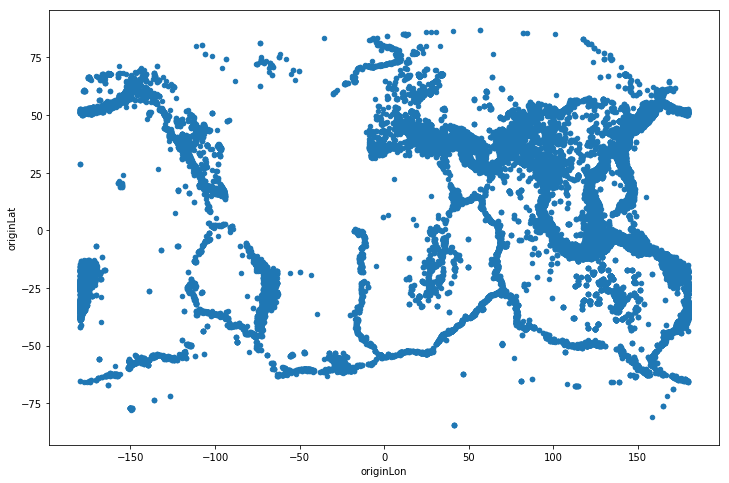

In [20]:
#plt.figure(); 
pdf2.plot.scatter(x='originLon', y='originLat',figsize=(12,8))

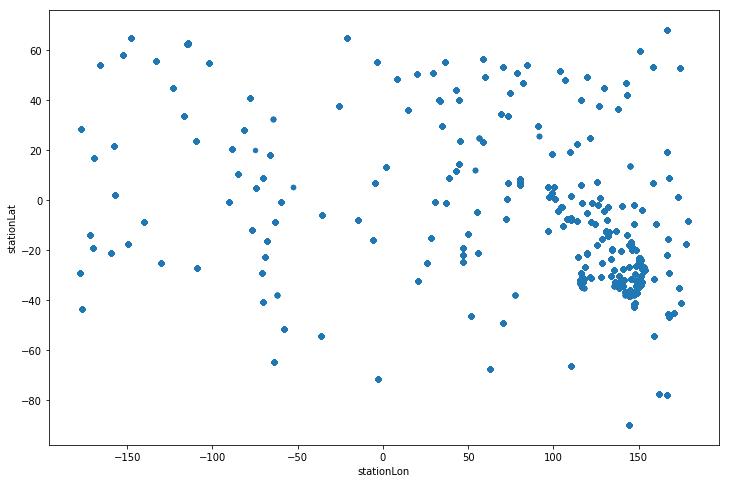

In [21]:
pdf2.plot.scatter(x='stationLon', y='stationLat',figsize=(12,8))

# 3. Geopandas and Maps

In [22]:
import geopandas as gpd

In [23]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [24]:
event_locations = [Point(xy) for xy in zip(pdf2.originLon, pdf2.originLat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

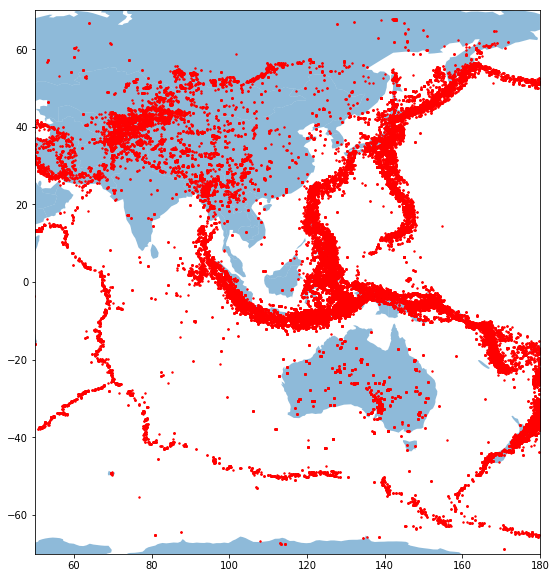

In [25]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([50,180])
myax.set_ylim([-70,70])
              
myax2=geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [26]:
station_locations = [Point(xy) for xy in zip(pdf2.stationLon, pdf2.stationLat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf['station'] =station_locations

In [27]:
# geopdf.plot(ax=myax2, marker='o', color='red', markersize=2)
# geopandas included shape datasets
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# myax=world.plot(alpha=0.5,  figsize=(20, 20))

# myax.set_xlim([-180,180])
# myax.set_ylim([-70,70])
              
geopdf.set_geometry('station').plot(ax=myax, marker='^', color='black', markersize=4);
#geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

<Figure size 432x288 with 0 Axes>

In [28]:
geopdf.geometry.name

'geometry'

In [29]:
geopdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114935 entries, 0 to 114934
Data columns (total 22 columns):
#eventID           114935 non-null object
originTimestamp    114935 non-null float64
mag                88876 non-null float64
originLon          114935 non-null float64
originLat          114935 non-null float64
originDepthKm      114935 non-null float64
net                114935 non-null object
sta                114935 non-null object
cha                114935 non-null object
pickTimestamp      114935 non-null float64
stationLon         114935 non-null float64
stationLat         114935 non-null float64
baz                114935 non-null float64
distance           114935 non-null float64
ttResidual         114935 non-null float64
snr                114935 non-null float64
bandIndex          114935 non-null int64
source_block       114935 non-null int64
station_block      114935 non-null int64
observed_tt        114935 non-null float64
geometry           114935 non-nu

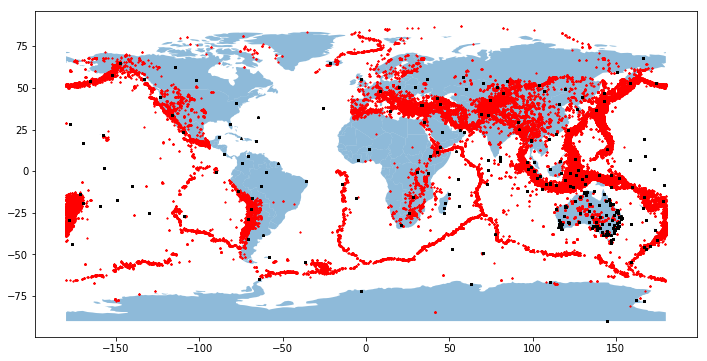

In [30]:
# composing two layers in a map
f, ax = plt.subplots(1, figsize=(12, 6))
# Add layer of polygons on the axis
world.plot(ax=ax, alpha=0.5,  figsize=(20, 10))

geopdf.plot(ax=ax, marker='*', color='red', markersize=2)
geop2= geopdf.set_geometry('station')
geop2.plot(ax=ax, marker='^', color='black', markersize=4)
plt.savefig('Swave_events_stations.png')

# Display
#plt.show()

In [31]:
geopdf.head()

,#eventID,originTimestamp,mag,originLon,originLat,originDepthKm,net,sta,cha,pickTimestamp,...,baz,distance,ttResidual,snr,bandIndex,source_block,station_block,observed_tt,geometry,station
0,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,PLCA,00T,1.250783e+09,...,156.900251,82.332581,-9.258177,83.7,1,13421,7798438,1366.905,POINT (140.2239 -53.6383),POINT (-70.55083 -40.73277)
1,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,LBTB,00T,1.250783e+09,...,236.102959,83.528121,0.007735,123.7,0,13421,7799196,1371.080,POINT (140.2239 -53.6383),POINT (25.59665 -25.0151)
2,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GE,GSI,BHZ,1.250783e+09,...,311.734998,65.183917,5.325953,21.9,0,13421,7800809,1164.200,POINT (140.2239 -53.6383),POINT (97.57550000000001 1.3039)
3,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,AU,GHSS,SHZ,1.378795e+09,...,357.224945,17.250461,7.771818,9.8,0,13960,20078,428.300,POINT (139.6028 -52.1611),POINT (138.6017 -34.9194)
4,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,IU,QSPA,00T,1.378795e+09,...,179.990190,37.954174,-2.049780,20.0,0,13960,7795500,792.225,POINT (139.6028 -52.1611),POINT (144.4382 -89.9289)


In [32]:
geop2.head()



,#eventID,originTimestamp,mag,originLon,originLat,originDepthKm,net,sta,cha,pickTimestamp,...,baz,distance,ttResidual,snr,bandIndex,source_block,station_block,observed_tt,geometry,station
0,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,PLCA,00T,1.250783e+09,...,156.900251,82.332581,-9.258177,83.7,1,13421,7798438,1366.905,POINT (140.2239 -53.6383),POINT (-70.55083 -40.73277)
1,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,LBTB,00T,1.250783e+09,...,236.102959,83.528121,0.007735,123.7,0,13421,7799196,1371.080,POINT (140.2239 -53.6383),POINT (25.59665 -25.0151)
2,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GE,GSI,BHZ,1.250783e+09,...,311.734998,65.183917,5.325953,21.9,0,13421,7800809,1164.200,POINT (140.2239 -53.6383),POINT (97.57550000000001 1.3039)
3,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,AU,GHSS,SHZ,1.378795e+09,...,357.224945,17.250461,7.771818,9.8,0,13960,20078,428.300,POINT (139.6028 -52.1611),POINT (138.6017 -34.9194)
4,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,IU,QSPA,00T,1.378795e+09,...,179.990190,37.954174,-2.049780,20.0,0,13960,7795500,792.225,POINT (139.6028 -52.1611),POINT (144.4382 -89.9289)


In [33]:
# stop

# Plot Arrival Rays (takes a few minutes to run)

In [34]:
mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf2['ray']= pdf2.apply(lambda x: LineString([(x.originLon, x.originLat), 
                (x.stationLon, x.stationLat)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry='ray')

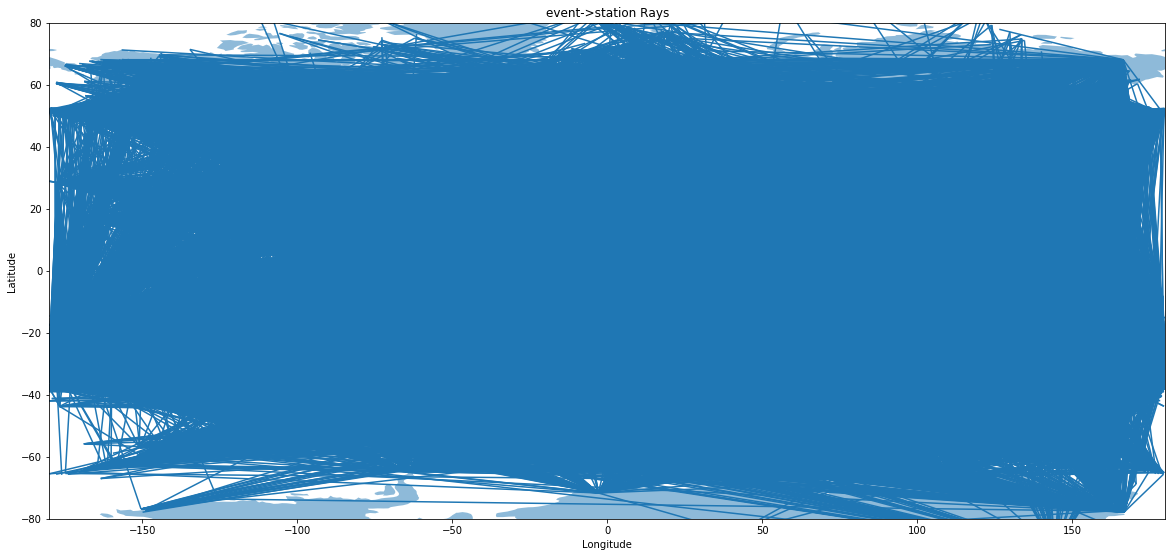

In [35]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 10))

mymap.set_xlim([-180,180])
mymap.set_ylim([-80,80])

# mymap.set_xlim([50,180])
# mymap.set_ylim([-70,70])

mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)